# picture output

In [22]:
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import os
import math

def train_2d(trainer):
    """Optimize a 2-dim objective function with a customized trainer."""
    # s1 and s2 are internal state variables and will 
    # be used later in the chapter
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(rounds):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

def set_figsize(figsize=(3.5, 2.5)):
    """Set matplotlib figure size."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
def use_svg_display():
    """Use svg format to display plot in jupyter."""
    display.set_matplotlib_formats('svg')
    
def show_trace_2d(f, res):
    """Show the trace of 2D variables during optimization."""
    x1, x2 = zip(*res)
    set_figsize()
    plt.plot(x1, x2, '-o', color='#ff7f0e')
    x1 = np.arange(-5.5, 1.0, 0.1)
    x2 = np.arange(min(-3.0, min(x2) - 1), max(1.0, max(x2) + 1), 0.1)
    x1, x2 = np.meshgrid(x1, x2)
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')
    #     CS = plt.contour(x1, x2, f(x1, x2), colors='#000000', levels = [0, 0.01, 0.05, 0.10, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0])
    #     plt.clabel(CS, inline = 1, fontsize = 7)
    #     # plt.clabel(CS, inline=1, fontsize=10)

    #     plt.xlabel('x1')
    #     plt.ylabel('x2')
    # #     if True:
    # #         if not os.path.exists(output_dir): os.mkdir(output_dir)
    # #         plt.savefig(os.path.join(output_dir, "SDG.png"), bbox_inches="tight")
    # #     else:
    # #         plt.show()
    #     plt.show()

# 目标函数

In [23]:
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

# 普通梯度下降，发散

epoch 20, x1 -0.387814, x2 -1673.365109


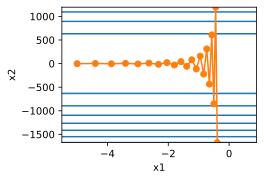

In [24]:
eta = 0.6
rounds = 20 # 迭代次数
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

show_trace_2d(f_2d, train_2d(gd_2d))

# Momentum，收敛


epoch 20, x1 0.007188, x2 0.002553


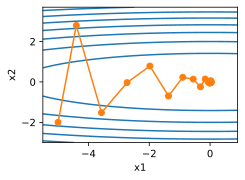

In [25]:
eta, gamma = 0.6, 0.5
rounds = 20

def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

show_trace_2d(f_2d, train_2d(momentum_2d))

# 比较

epoch 10, x1 -2.171942, x2 -0.012093


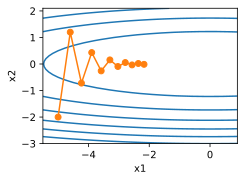

In [26]:
eta = 0.4
rounds = 10

show_trace_2d(f_2d, train_2d(gd_2d))

epoch 10, x1 -0.753813, x2 0.015809


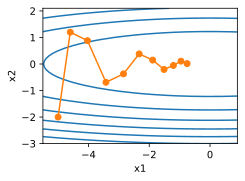

In [27]:
show_trace_2d(f_2d, train_2d(momentum_2d))

可以看出，在均收敛且迭代次数相同的情况下，动量法的值更加接近最优值